# Up and down regulation of genes expression

In [1]:
from reframed.io.sbml import load_cbmodel
model = load_cbmodel('models/ec/iJO1366SL.xml', flavor='cobra')


In [2]:
from mewpy.optimization.evaluation import BPCY,WYIELD
from mewpy.problems import GOUProblem
from mewpy.simulation import SimulationMethod

In [3]:
BIOMASS_ID = 'R_Ec_biomass_iJO1366_core_53p95M'
O2 = 'R_EX_o2_LPAREN_e_RPAREN_'
GLC = 'R_EX_glc_LPAREN_e_RPAREN_'
PRODUCT_ID = 'R_EX_phe_DASH_L_LPAREN_e_RPAREN_'
model.set_objective({BIOMASS_ID:1})

evaluator_1 = BPCY(BIOMASS_ID, PRODUCT_ID, method = SimulationMethod.lMOMA )
evaluator_2 = WYIELD(BIOMASS_ID,PRODUCT_ID)

In [4]:
problem = GOUProblem(model,[evaluator_1,evaluator_2])

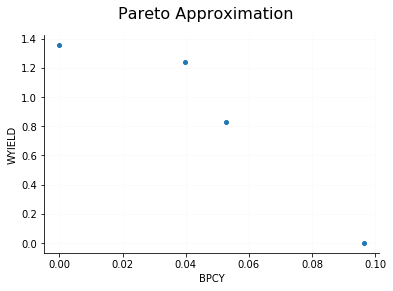

Gen    Eval|     Worst      Best    Median   Average   Std Dev|     Worst      Best    Median   Average   Std Dev|
   0    100|  0.000000  0.096432  0.000000  0.005725  0.015206|  0.000000  1.354517  0.001483  0.051650  0.227373|
   1    200|  0.000000  0.116426  0.004193  0.011783  0.020218|  0.000000  1.447548  0.001672  0.115014  0.332870|
   2    300|  0.000000  0.251787  0.012390  0.026108  0.037901|  0.000000  1.569902  0.001670  0.230962  0.437568|
   3    400|  0.000000  0.256882  0.052852  0.054467  0.049118|  0.000000  1.569902  0.826813  0.570861  0.517276|
   4    500|  0.000000  0.370057  0.064403  0.092352  0.078404|  0.000000  1.569902  1.142427  0.850169  0.544001|
   5    600|  0.000000  0.495331  0.116426  0.139352  0.094876|  0.013716  1.569902  1.241312  0.930842  0.597448|
   6    700|  0.023129  0.495331  0.198245  0.194314  0.112813|  0.013716  1.783290  1.241312  1.039205  0.573568|
   7    800|  0.057806  0.495331  0.227338  0.262550  0.118652|  0.013716  1.783

In [5]:
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

from mewpy.optimization import EA
ea = EA(problem, max_generations= 10, mp = True, visualizer = True)
final_pop = ea.run()